# Graph which represent authors and their publications from HSC Center

## About the data

The data where downloaded from a __[website](http://prac.im.pwr.wroc.pl/~hugo/HSC/Publications.html")__, where are personal data about authors and names of puplications that their created.

In [11]:
import requests
import networkx as nx
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations

To make every subpoints in this task i used a lot of libraries which are very helpful: BeautifulSoup helps get the data from website and saved them into a table, networkx is used to create graph and get to each node etc.

In [12]:
url = 'http://prac.im.pwr.wroc.pl/~hugo/HSC/Publications.html' #the website that I will be scrapping
result = requests.get(url)
soup = BeautifulSoup(result.content,"lxml")   # getting html

In [13]:
names = []
for o in soup.findAll('ol', attrs={'type': "1"})[2:28]:   # taking only the publications
    group = o.findAll('li')
    for part in group:   # one part contain everything about autor inside
        one = []
        for item in part.findAll('b'): # 'b' because only bold are from HSC
            one.append(item.text)
        names.append(one)
        
print(names)

[['M.Balcerek', 'K.Burnecki'], ['A.Grzesiek', 'A.Wylomanska'], ['J.Gruszka', 'J.Szwabiński'], ['A.Grzesiek', 'A.Wyłomańska'], ['A.Grzesiek', 'G.Sikora', 'M.Teuerle', 'A.Wyłomańska'], ['A.Grzesiek', 'M.Teuerle', 'A.Wyłomańska'], ['A.Grzesiek', 'A.Wyłomańska'], ['A.Grzesiek', 'A.Wyłomańska'], ['J.Hebda-Sobkowicz', 'A.Wyłomańska'], ['J.Hebda-Sobkowicz', 'A.Wyłomańska'], ['J.Janczura'], ['J.Janczura', 'P.Kowalek', 'H.Loch-Olszewska', 'J.Szwabiński', 'A.Weron'], ['J.Janczura'], ['P.Kruczek', 'A.Wyłomańska'], ['G.Krzyżanowski', 'M.Magdziarz', 'Ł.Płociniczak'], ['A.Wyłomańska'], ['P.Kruczek', 'A.Wyłomańska'], ['Ł.Bielak', 'A.Wyłomańska'], ['G.Sikora', 'A.Wyłomańska'], ['A.Stanislavsky', 'W.Nitka', 'M.Małek', 'K.Burnecki', 'J.Janczura'], ['A.Stanislawsky', 'A.Weron'], ['A.Stanislawsky', 'A.Weron'], ['J.Janczura', 'P.Kowalek', 'H.Loch-Olszewska', 'J.Szwabiński', 'A.Weron'], ['Ł.Bielak', 'A.Wyłomańska'], ['A.Wyłomańska'], ['A.Wyłomańska'], ['A.Wyłomańska'], ['A.Wyłomańska', 'K.Burnecki'], ['Z.Pa

After save data about the authors I created a dictionary which should replace all of the polish characters into international.

In [14]:
def replace(text): #replace Polish symbols
    replacements = {
        "ą":"a",
        'ä':'a',
        'ć':'c',
        'ę':'e',
        'ł':'l',
        'ń':'n',
        'ó':'o',
        'ö':'o',
        'ü':'u',
        'ś':'s',
        'ż':'z',
        'ź':'z',
        'Ą':'A',
        'Ć':'C',
        'Ę':'E',
        'Ł':'L',
        'Ó':'O',
        'Ś':'S',
        'Ż':'Z',
        'Ź':'Z',
        'v':'w',
    }
    text = "".join([replacements.get(c, c) for c in text])
    return text
authors = []
for name in names:
    new_names = []
    for item in name:
        new_item = replace(item) #replaceing polish char
        new_item = new_item.replace(' ', '')   # removing spaces
        new_item = new_item.split('-')[0]   # removing second surname
        new_names.append(new_item)
    if new_names:
        authors.append(new_names)
print(authors) #new list of authors

[['M.Balcerek', 'K.Burnecki'], ['A.Grzesiek', 'A.Wylomanska'], ['J.Gruszka', 'J.Szwabinski'], ['A.Grzesiek', 'A.Wylomanska'], ['A.Grzesiek', 'G.Sikora', 'M.Teuerle', 'A.Wylomanska'], ['A.Grzesiek', 'M.Teuerle', 'A.Wylomanska'], ['A.Grzesiek', 'A.Wylomanska'], ['A.Grzesiek', 'A.Wylomanska'], ['J.Hebda', 'A.Wylomanska'], ['J.Hebda', 'A.Wylomanska'], ['J.Janczura'], ['J.Janczura', 'P.Kowalek', 'H.Loch', 'J.Szwabinski', 'A.Weron'], ['J.Janczura'], ['P.Kruczek', 'A.Wylomanska'], ['G.Krzyzanowski', 'M.Magdziarz', 'L.Plociniczak'], ['A.Wylomanska'], ['P.Kruczek', 'A.Wylomanska'], ['L.Bielak', 'A.Wylomanska'], ['G.Sikora', 'A.Wylomanska'], ['A.Stanislawsky', 'W.Nitka', 'M.Malek', 'K.Burnecki', 'J.Janczura'], ['A.Stanislawsky', 'A.Weron'], ['A.Stanislawsky', 'A.Weron'], ['J.Janczura', 'P.Kowalek', 'H.Loch', 'J.Szwabinski', 'A.Weron'], ['L.Bielak', 'A.Wylomanska'], ['A.Wylomanska'], ['A.Wylomanska'], ['A.Wylomanska'], ['A.Wylomanska', 'K.Burnecki'], ['Z.Palmowski'], ['M.Balcerek', 'H.Loch', 'A.W

In [15]:
authors_publications = dict(Counter([guy for person in authors for guy in person]))
#Creating dictionary with sizes which is the quantity of publications
print(authors_publications)

{'M.Balcerek': 5, 'K.Burnecki': 76, 'A.Grzesiek': 10, 'A.Wylomanska': 135, 'J.Gruszka': 1, 'J.Szwabinski': 9, 'G.Sikora': 28, 'M.Teuerle': 20, 'J.Hebda': 2, 'J.Janczura': 29, 'P.Kowalek': 3, 'H.Loch': 8, 'A.Weron': 94, 'P.Kruczek': 11, 'G.Krzyzanowski': 2, 'M.Magdziarz': 68, 'L.Plociniczak': 20, 'L.Bielak': 3, 'A.Stanislawsky': 5, 'W.Nitka': 1, 'M.Malek': 1, 'Z.Palmowski': 27, 'A.Wilkowska': 1, 'A.Kumar': 1, 'R.Poloczanski': 5, 'T.Zorawik': 8, 'A.Michalak': 1, 'J.Slezak': 8, 'G.Zak': 10, 'D.Kucharczyk': 2, 'A.Fulinski': 1, 'J.Gajda': 21, 'J.Sokolowski': 1, 'J.Goncerzewicz': 1, 'J.Obuchowski': 18, 'W.Okrasinski': 9, 'M.Muszkieta': 4, 'R.Weron': 84, 'S.Orzel': 6, 'W.Mydlarczyk': 1, 'A.Jurlewicz': 36, 'J.Iwanik': 2, 'E.Broszkiewicz': 9, 'J.Nowicka': 23, 'A.Misiorek': 16, 'M.Borgosz': 9, 'Z.Michna': 9, 'P.Mista': 5, 'M.Kozlowski': 4, 'T.Piesiewicz': 2, 'A.Makagon': 1, 'P.Wilman': 1, 'G.Kukla': 4, 'S.Ondruszko': 1, 'B.Stawiarski': 1, 'B.Kozlowska': 1, 'M.Kotulski': 7, 'B.Przybylowicz': 1, '

In [16]:
G=nx.Graph()
#Creating graph with networkx
for author in authors:
    if len(author) > 1: 
    #again I created the loop to add weight to this graph
        connections = list(combinations(author,2)) #that combinations() function helps create edge between 2 authors
        for i,j in connections:
            if (i,j) in G.edges() or (j,i) in G.edges():
                G[i][j]['weight'] += 1 #adding weights
            else:
                G.add_edge(i, j, weight = 1)
                
    elif author[0] not in G.nodes():
        G.add_node(author[0])


In [17]:
sizes = [authors_publications[author]*30 for author in list(G.nodes)] #it will help to establish the size of each node

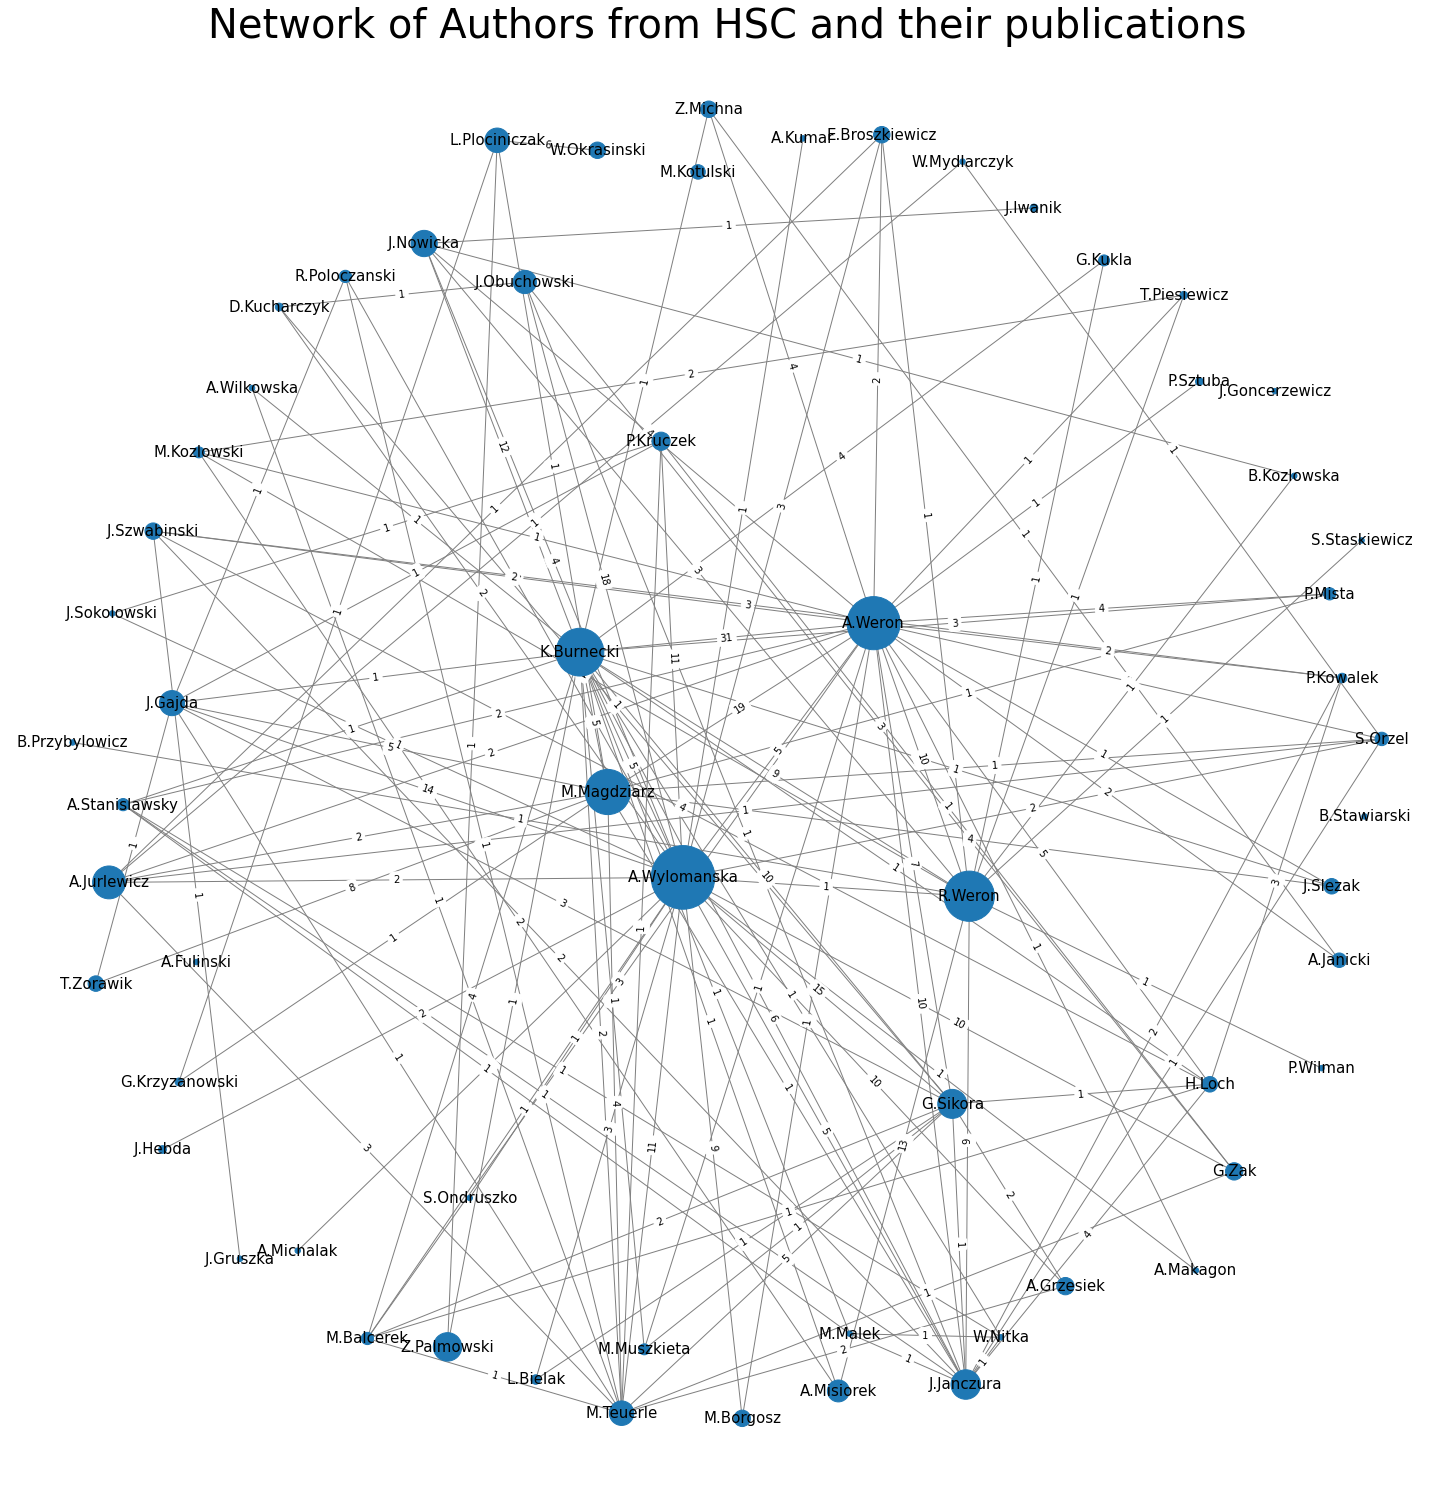

In [18]:
#Creating plot with graph, size of nodes are proportional to the number of publications
plt.figure(figsize = (20,20)) 
pos = nx.spring_layout(G, k = 3)
nx.draw(G, pos, node_size = sizes, with_labels = True, font_size=15, edge_color='gray')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels, font_size = 10)
plt.title("Network of Authors from HSC and their publications", fontdict = {'fontsize' : 40})
plt.show()

In [19]:
nx.number_of_isolates(G) # How many edges are isolated

4

In [20]:
[i for i in nx.isolates(G)] #Who is this isolated node

['A.Fulinski', 'J.Goncerzewicz', 'B.Stawiarski', 'M.Kotulski']